From Example 4.3 of chapter 4 
Gambler’s Problem:
A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, or loses by running out of money. On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. This problem can be formulated as an undiscounted,episodic, finite MDP. The state is the gambler’s capital, s ∈ {1, 2, . . . , 99} and the actions are stakes,a ∈ {0, 1, . . . , min(s, 100 − s)}. The reward is zero on all transitions except those on which the gambler
reaches his goal, when it is +1. The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let p h denote the probability of the coin coming up heads. If p h is known, then the entire problem is known and it can be solved, for instance, by value iteration.

Using Value iteration to solve the problem:
Initialize array V arbitrarily (e.g., V (s) = 0 for all s ∈ S + )
Repeat
∆ ← 0
For each s ∈ S:
v ← V (s)
V (s) ← max a s ,r p(s , r |s, a) r + γV (s )
∆ ← max(∆, |v − V (s)|)
until ∆ < θ (a small positive number)
Output a deterministic policy, π ≈ π ∗ , such that
π(s) = argmax a s ,r p(s , r |s, a) r + γV (s )

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77

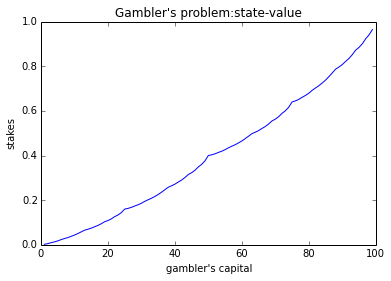

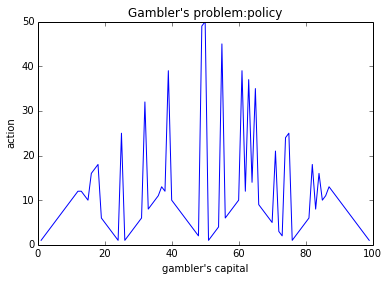

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
def prob(s_pi,r,s,a,p):
    ret = 0
    if s_pi != s + a and s_pi != s - a :
        ret = 0
    elif s_pi != 100 and r == 1:
        ret = 0
    elif s_pi == 100 and r == 0:
        ret = 0
    else:
        if a == 0:
            ret = 1        
        elif s_pi == s+a:
            ret = p         
        elif s_pi == s-a:
            ret = 1-p
    return ret

#init state_values to 0

p = 0.4
state_values = {};
state_list = []
for i in range(0,101):
    state_list.append(i)
    state_values[i] = 0
print state_values
print state_list
th = 1e-20
flag = True
pi = {}
for k in range(500):    
    delta = 0
    pi = {}
    for s in state_list:
        if s==0 or s==100:
            continue
        v = state_values[s]
        maxa = 0       
        for a in range(1,1+min(s,100-s)):
            #set of s'
            if a == 0:
                s_pi_list = [s]
            else:
                s_pi_list = [s+a,s-a]
            
            #set of r
            r_list = [0,1]
            #product of s' and r
            qsa = 0            
            for (s_pi,r) in itertools.product(s_pi_list,r_list):
                qsa = qsa + prob(s_pi,r,s,a,p)*(r+state_values[s_pi])
                #print s_pi,r,s,a,prob(s_pi,r,s,a,p)
                    
            if qsa>maxa:
                maxa = qsa
                pi[s] = a
        state_values[s] = maxa
        delta = max(delta,abs(v - state_values[s]))
    if delta<th:
        flag = False
           
print state_values
#get optimal policy:
pi_star = {}
for s in state_list:
        if s==0 or s==100:
            continue
        
        maxa = 0       
        for a in range(1,1+min(s,100-s)):                
            #set of s'
            if a == 0:
                s_pi_list = [s]
            else:
                s_pi_list = [s+a,s-a]
            
            #set of r
            r_list = [0,1]
            #product of s' and r
            qsa = 0            
            for (s_pi,r) in itertools.product(s_pi_list,r_list):
                qsa = qsa + prob(s_pi,r,s,a,p)*(r+state_values[s_pi])
            if qsa>maxa:
                maxa = qsa
                pi_star[s] = a  
                
print pi_star  

#draw picture of state-value:
%matplotlib inline
X = []
Y = []
for x,y in state_values.items():
    if x==0 or x==100:
        continue
    X.append(x)
    Y.append(y)
plt.plot(X,Y)
plt.title("Gambler's problem:state-value")
plt.xlabel("gambler's capital")
plt.ylabel("stakes")
plt.show()
#draw optimal policy:
X = []
Y = []
for x,y in pi_star.items():
    if x==0 or x==100:
        continue
    X.append(x)
    Y.append(y)
plt.plot(X,Y)
plt.title("Gambler's problem:policy")
plt.xlabel("gambler's capital")
plt.ylabel("action")
plt.show()